<a href="https://colab.research.google.com/github/IEn-Lee/DSSS_WS24-25_exercise10/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install line_profiler
%load_ext line_profiler

In [ ]:
import numpy as np
from skimage import data, color
from skimage.transform import resize

In [ ]:
imgs = np.uint8(data.lfw_subset()*255)

def res_skimage(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = resize(im, new_size, anti_aliasing=True)
        res_im.append(image_resized)
    return np.asarray(res_im)


In [ ]:
# 測試資料
imgs = np.random.randint(0, 255, (100, 64, 64), dtype=np.uint8)

# 使用 %lprun 進行剖析
%lprun -f res_skimage res_skimage(imgs)

Timer unit: 1e-07 s

Total time: 0.0680314 s
File: C:\Users\USER\AppData\Local\Temp\ipykernel_27144\634147576.py
Function: res_skimage at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def res_skimage(imgs):
     4         1         49.0     49.0      0.0      new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
     5         1          2.0      2.0      0.0      res_im = []
     6       101       1089.0     10.8      0.2      for im in imgs:
     7       100     672953.0   6729.5     98.9          image_resized = resize(im, new_size, anti_aliasing=True)
     8       100       1140.0     11.4      0.2          res_im.append(image_resized)
     9         1       5081.0   5081.0      0.7      return np.asarray(res_im)

In [ ]:
def res_skimage_optimized(imgs):
    new_size = (imgs.shape[1] // 2, imgs.shape[2] // 2)
    resized_imgs = [resize(img, new_size, anti_aliasing=True) for img in imgs]
    return np.array(resized_imgs)

In [ ]:
%lprun -f res_skimage_optimized res_skimage_optimized(imgs)

Timer unit: 1e-07 s

Total time: 0.053577 s
File: C:\Users\USER\AppData\Local\Temp\ipykernel_27144\623123810.py
Function: res_skimage_optimized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def res_skimage_optimized(imgs):
     2         1         78.0     78.0      0.0      new_size = (imgs.shape[1] // 2, imgs.shape[2] // 2)
     3         1     531684.0 531684.0     99.2      resized_imgs = [resize(img, new_size, anti_aliasing=True) for img in imgs]
     4         1       4008.0   4008.0      0.7      return np.array(resized_imgs)

In [ ]:
import multiprocessing as mp
import time

# 原始計算 Pi 的函數
def approximate_pi(n):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    return 2 * pi_2

# 測試數據
nums = [1_822_725, 22_059_421, 32_374_695, 88_754_320, 97_162_66, 200_745_654]

# 並行執行函數
def parallel_execution(nums):
    with mp.Pool(processes=mp.cpu_count()) as pool:
        results = pool.map(approximate_pi, nums)
    return results

# 主函數
def main():
    # 順序執行
    start = time.time()
    sequential_results = [approximate_pi(n) for n in nums]
    sequential_time = time.time() - start
    print(f"Sequential execution time: {sequential_time:.2f} seconds")

    # 並行執行
    start = time.time()
    parallel_results = parallel_execution(nums)
    parallel_time = time.time() - start
    print(f"Parallel execution time: {parallel_time:.2f} seconds")

    # 效能提升
    improvement = sequential_time / parallel_time
    print(f"Speedup: {improvement:.2f}x")

    # 返回結果
    return sequential_results, parallel_results, sequential_time, parallel_time, improvement

# 在 Jupyter Notebook 中執行
if __name__ == "__main__":
    sequential_results, parallel_results, sequential_time, parallel_time, improvement = main()


Sequential execution time: 44.22 seconds
Parallel execution time: 49.40 seconds
Speedup: 0.90x


In [ ]:
from numba import jit
import time

# 原始計算 Pi 的函數（不優化）
def approximate_pi_unoptimized(n):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    return 2 * pi_2

# 使用 Numba 的 JIT 編譯器優化函數
@jit(nopython=True)
def approximate_pi_optimized(n):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    return 2 * pi_2

# 測試數據
nums = [1_822_725, 22_059_421, 32_374_695, 88_754_320, 97_162_666, 200_745_654]

# 計算優化前的執行時間
start = time.time()
sequential_results_before = [approximate_pi_unoptimized(n) for n in nums]
sequential_time_before = time.time() - start

# 計算優化後的執行時間
start = time.time()
sequential_results_after = [approximate_pi_optimized(n) for n in nums]
sequential_time_after = time.time() - start

# 計算提升百分比
time_reduction = sequential_time_before - sequential_time_after
percent_faster = (time_reduction / sequential_time_before) * 100

# 輸出結果
print(f"Sequential execution time before optimization: {sequential_time_before:.2f} seconds")
print(f"Sequential execution time after Numba optimization: {sequential_time_after:.2f} seconds")
print(f"Improvement: {percent_faster:.2f}% faster")


Sequential execution time before optimization: 56.38 seconds
Sequential execution time after Numba optimization: 2.49 seconds
Improvement: 95.58% faster


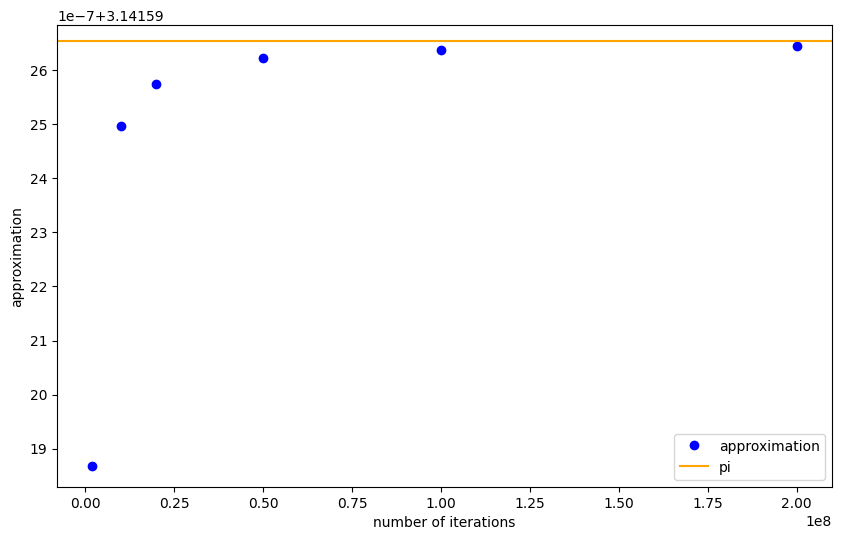

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pi 近似計算函數
def approximate_pi(n):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    return 2 * pi_2

# 定義不同的迭代次數
iterations = [2000000, 10000000, 20000000, 50000000, 100000000, 200000000]

# 計算每次迭代的 Pi 近似值
approximations = [approximate_pi(n) for n in iterations]

# 真實 Pi 值
real_pi = np.pi

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.plot(iterations, approximations, 'bo', label='approximation')
plt.axhline(y=real_pi, color='orange', linestyle='-', label='pi')

# 設定標題與標籤
plt.xlabel('number of iterations')
plt.ylabel('approximation')
plt.legend()

# 顯示圖表
plt.show()


In [ ]:
print(real_pi, approximations)

3.141592653589793 [3.1415918681915005, 3.1415924965090136, 3.1415925750481657, 3.1415926221704638, 3.141592637878503, 3.141592645732001]
